In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("D:/phd/合作项目/chenxiproject/transport/code/Plan A/data.csv")

C:\Users\jiawe\AppData\Local\Temp\ipykernel_80784\4089837081.py:1: DtypeWarning: Columns (1,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("D:/phd/合作项目/chenxiproject/transport/code/Plan A/data.csv")


In [3]:
data.head()

,participant_id,age,sex,trip_id,trip_mode,trip_duration,city_name,trip_new_mode,City_name,population,GDP,city_size,day_of_week
0,1,36.0,Male,1.0,bus,60.0,accra-,public transport,Accra,240.0,380.0,225.0,Wednesday
1,1,36.0,Male,2.0,bus,30.0,accra-,public transport,Accra,240.0,380.0,225.0,Wednesday
2,1,36.0,Male,3.0,bus,30.0,accra-,public transport,Accra,240.0,380.0,225.0,Wednesday
3,1,36.0,Male,4.0,bus,60.0,accra-,public transport,Accra,240.0,380.0,225.0,Wednesday
4,1,36.0,Male,5.0,taxi,60.0,accra-,car,Accra,240.0,380.0,225.0,Wednesday


In [4]:

# 计算每个城市中 trip_new_mode 的比例
city_mode_shares = data.groupby('city_name')['trip_new_mode'].value_counts(normalize=True).unstack().fillna(0)

# 重命名列
city_mode_shares = city_mode_shares.rename(columns={
    'walking': 'walking_share',
    'cycling': 'cycling_share',
    'public transport': 'public_transport_share',
    'car': 'car_share',
    'other': 'other_share'
})

# 将 share 合并回原始 df
result_df = data.merge(city_mode_shares, on='city_name', how='left')
result_df

,participant_id,age,sex,trip_id,trip_mode,trip_duration,city_name,trip_new_mode,City_name,population,GDP,city_size,day_of_week,car_share,cycling_share,other_share,public_transport_share,walking_share
0,1,36.0,Male,1.000000e+00,bus,60.0,accra-,public transport,Accra,240.00,380.00,225.0,Wednesday,0.148904,0.021027,0.0,0.282371,0.547698
1,1,36.0,Male,2.000000e+00,bus,30.0,accra-,public transport,Accra,240.00,380.00,225.0,Wednesday,0.148904,0.021027,0.0,0.282371,0.547698
2,1,36.0,Male,3.000000e+00,bus,30.0,accra-,public transport,Accra,240.00,380.00,225.0,Wednesday,0.148904,0.021027,0.0,0.282371,0.547698
3,1,36.0,Male,4.000000e+00,bus,60.0,accra-,public transport,Accra,240.00,380.00,225.0,Wednesday,0.148904,0.021027,0.0,0.282371,0.547698
4,1,36.0,Male,5.000000e+00,taxi,60.0,accra-,car,Accra,240.00,380.00,225.0,Wednesday,0.148904,0.021027,0.0,0.282371,0.547698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081666,2019003159,69,Female,2.019042e+09,Non-local bus,100.0,Scotland,public transport,Glasgow,59.16,28.37,175.0,Tuesday,0.688312,0.004329,0.0,0.155844,0.151515
2081667,2019006584,56,Female,2.019087e+09,Non-local bus,50.0,Scotland,public transport,Glasgow,59.16,28.37,175.0,Tuesday,0.688312,0.004329,0.0,0.155844,0.151515
2081668,2019006584,51,Female,2.019087e+09,Non-local bus,60.0,Scotland,public transport,Glasgow,59.16,28.37,175.0,Thursday,0.688312,0.004329,0.0,0.155844,0.151515
2081669,2019006583,58,Male,2.019087e+09,Non-local bus,60.0,Scotland,public transport,Glasgow,59.16,28.37,175.0,Thursday,0.688312,0.004329,0.0,0.155844,0.151515


In [5]:
data_London = result_df[result_df['City_name'] == 'London']
data_London

,participant_id,age,sex,trip_id,trip_mode,trip_duration,city_name,trip_new_mode,City_name,population,GDP,city_size,day_of_week,car_share,cycling_share,other_share,public_transport_share,walking_share
1879382,2019000134,51.0,Male,2.019002e+09,Car / van driver,30.0,London,car,London,917.65,643.0,1572.0,Friday,0.472426,0.028467,0.0,0.366538,0.132568
1879383,2019000134,58.0,Male,2.019002e+09,Car / van driver,30.0,London,car,London,917.65,643.0,1572.0,Monday,0.472426,0.028467,0.0,0.366538,0.132568
1879384,2019000134,51.0,Male,2.019002e+09,Car / van driver,30.0,London,car,London,917.65,643.0,1572.0,Wednesday,0.472426,0.028467,0.0,0.366538,0.132568
1879385,2019000134,51.0,Male,2.019002e+09,Car / van driver,30.0,London,car,London,917.65,643.0,1572.0,Thursday,0.472426,0.028467,0.0,0.366538,0.132568
1879386,2019000134,51.0,Male,2.019002e+09,Car / van driver,30.0,London,car,London,917.65,643.0,1572.0,Monday,0.472426,0.028467,0.0,0.366538,0.132568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081611,2019010929,77,Female,2.019144e+09,Non-local bus,120.0,London,public transport,London,917.65,643.0,1572.0,Thursday,0.472426,0.028467,0.0,0.366538,0.132568
2081612,2019012364,48,Female,2.019162e+09,Non-local bus,110.0,London,public transport,London,917.65,643.0,1572.0,Monday,0.472426,0.028467,0.0,0.366538,0.132568
2081613,2019012364,43,Female,2.019162e+09,Non-local bus,110.0,London,public transport,London,917.65,643.0,1572.0,Thursday,0.472426,0.028467,0.0,0.366538,0.132568
2081614,2019012364,41,Female,2.019162e+09,Non-local bus,110.0,London,public transport,London,917.65,643.0,1572.0,Friday,0.472426,0.028467,0.0,0.366538,0.132568


In [6]:
result_df['city_name'].unique()

array(['accra-', 'antofagasta', 'arica', 'bangalore', 'belo_horizonte',
       'bogota_wb', 'buenos_aires', 'cali', 'cape_town', 'copiapo',
       'coquimbo_laserena', 'delhi', 'gran_valparaiso',
       'iquique_altohospicio', 'kisumu', 'medellin',
       'mexico_city_WeekAndSaturday', 'montevideo', 'nairobi', 'osorno',
       'port_louis', 'puerto_montt', 'santiago_regular_summer_season',
       'san_antonio', 'sao_paulo', 'temuco_padrelascasas', 'valdivia',
       'vizag', 'London', 'South East', 'South West', 'East of England',
       'North West', 'Yorkshire and the Humber', 'East Midlands',
       'West Midlands', 'North East', 'Wales', 'Scotland'], dtype=object)

In [7]:
#
df = result_df.copy()
df["age"] = pd.to_numeric(df["age"], errors="coerce")
df["trip_duration"] = pd.to_numeric(df["trip_duration"], errors="coerce")

# Remove mexico_city_WeekAndSaturday
df= df[df["city_name"]!="mexico_city_WeekAndSaturday"]

In [8]:
city_to_country = {
    'accra-': 'ghana',
    'antofagasta': 'chile',
    'arica': 'chile',
    'bangalore': 'india',
    'belo_horizonte': 'brazil',
    'bogota_wb': 'colombia',
    'buenos_aires': 'argentina',
    'cali': 'colombia',
    'cape_town': 'south_africa',
    'copiapo': 'chile',
    'coquimbo_laserena': 'chile',
    'delhi': 'india',
    'gran_valparaiso': 'chile',
    'iquique_altohospicio': 'chile',
    'kisumu': 'kenya',
    'medellin': 'colombia',
    'mexico_city_WeekAndSaturday': 'mexico',  # Fixed typo from original input
    'montevideo': 'uruguay',
    'nairobi': 'kenya',
    'osorno': 'chile',
    'port_louis': 'mauritius',
    'puerto_montt': 'chile',
    'santiago_regular_summer_season': 'chile',
    'san_antonio': 'chile',
    'sao_paulo': 'brazil',
    'temuco_padrelascasas': 'chile',
    'valdivia': 'chile',
    'vizag': 'india'
    
}

df['country'] = df['city_name'].map(city_to_country)

In [9]:
cityOld_to_cityNew = {
    'accra-': 'accra',
    'antofagasta': 'antofagasta',
    'arica': 'arica',
    'bangalore': 'bengaluru', #
    'belo_horizonte': 'belo_horizonte',
    'bogota_wb': 'bogota',
    'buenos_aires': 'buenos_aires',
    'cali': 'cali',
    'cape_town': 'cape_town',
    'copiapo': 'copiapo',
    'coquimbo_laserena': 'coquimbo',
    'delhi': 'new_delhi',
    'gran_valparaiso': 'valparaiso',
    'iquique_altohospicio': 'iquique',
    'kisumu': 'kisumu',
    'medellin': 'medellin',
    'mexico_city_WeekAndSaturday': 'mexico_city',  # Fixed typo from original input
    'montevideo': 'montevideo',
    'nairobi': 'nairobi',
    'osorno': 'osorno',
    'port_louis': 'port_louis',
    'puerto_montt': 'puerto_montt',
    'santiago_regular_summer_season': 'santiago',
    'san_antonio': 'san_antonio',
    'sao_paulo': 'sao_paulo',
    'temuco_padrelascasas': 'temuco',
    'valdivia': 'valdivia',
    'vizag': 'visakhapatnam',
    'London':'london',
}

df["city_name_iso"]=df["city_name"].map(cityOld_to_cityNew)


In [10]:
df["new_participant_id"] = df["city_name"] + "_" + df["participant_id"].astype(str) + "_" + df["sex"]
df["new_trip_id"] = df["new_participant_id"] + "_" + df["trip_id"].astype(str)

In [11]:
df["city_name_iso"].unique()

array(['accra', 'antofagasta', 'arica', 'bengaluru', 'belo_horizonte',
       'bogota', 'buenos_aires', 'cali', 'cape_town', 'copiapo',
       'coquimbo', 'new_delhi', 'valparaiso', 'iquique', 'kisumu',
       'medellin', 'montevideo', 'nairobi', 'osorno', 'port_louis',
       'puerto_montt', 'santiago', 'san_antonio', 'sao_paulo', 'temuco',
       'valdivia', 'visakhapatnam', 'london', nan], dtype=object)

In [12]:
df["trip_mode"].value_counts()

# Create a mapping dictionary for recategorization
mode_mapping = {
    'bus': 'pt',
    'pedestrian': 'walk',
    'car': 'car',
    'rail': 'pt',
    'taxi': 'car',
    'motorcycle': 'bike',
    'cycle': 'bike',
    'other': 'other',
    'auto_rickshaw': 'other',
    'truck': 'other'
}

df['trip_new_mode'] = df['trip_mode'].map(mode_mapping)

In [13]:
df['trip_new_mode'].value_counts()

trip_new_mode
walk     364349
car      347064
pt       320113
bike      81862
other     15857
Name: count, dtype: int64

In [14]:
# cities in the dataset

df["city_name_iso"].unique()

array(['accra', 'antofagasta', 'arica', 'bengaluru', 'belo_horizonte',
       'bogota', 'buenos_aires', 'cali', 'cape_town', 'copiapo',
       'coquimbo', 'new_delhi', 'valparaiso', 'iquique', 'kisumu',
       'medellin', 'montevideo', 'nairobi', 'osorno', 'port_louis',
       'puerto_montt', 'santiago', 'san_antonio', 'sao_paulo', 'temuco',
       'valdivia', 'visakhapatnam', 'london', nan], dtype=object)

In [15]:
# List of columns to check
columns_to_check = [
    'age',
    'sex',
    'trip_mode',
    'trip_duration',
    'trip_new_mode',
    'car_share', 
    'cycling_share', 
    'other_share', 
    'public_transport_share', 
    'walking_share', 
    'population', 
    'GDP', 
    'city_size'
]

# Check for NaN values in the specified columns
nan_counts = df[columns_to_check].isna().sum()

# Print the results
print("NaN counts in each column:")
print("##########################")
print(nan_counts)
print("##########################")

NaN counts in each column:
##########################
age                         1953
sex                         1296
trip_mode                 178521
trip_duration             179488
trip_new_mode             380810
car_share                      0
cycling_share                  0
other_share                    0
public_transport_share         0
walking_share                  0
population                     0
GDP                            0
city_size                      0
dtype: int64
##########################


In [16]:
# Define the bin edges (note these are the lower bounds of each group)
bins = [0, 5, 11, 16, 18, 30, 50, 60, 70, 125]  # 125 as upper limit

# Define the corresponding labels
labels = [
    "0-4",
    "5-10",
    "11-15",
    "16-17",
    "18-29",
    "30-49",
    "50-59",
    "60-69",
    "70+"
]

# Define the corresponding category numbers
category_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # 1=0-4, 2=5-10, ..., 9=70+

# Assign age group categories
df["p.age_gr"] = pd.cut(
    df["age"],
    bins=bins,
    labels=category_numbers,
    right=False
)

# Optional: Also keep the original labels if needed
df["age_group_label"] = pd.cut(
    df["age"],
    bins=bins,
    labels=labels,
    right=False
)

In [17]:
stats_before = df.shape

df_filtered= df.copy()

df_filtered= df_filtered.dropna(subset=['trip_duration'])
df_filtered = df_filtered[df_filtered['trip_duration'] <= 360]
df_filtered = df_filtered[df_filtered['age'] <= 100]

print("Nb of rows removed: " + str(stats_before[0]- df_filtered.shape[0]))
df_filtered.to_csv('data_filtered.csv', index=False)

Nb of rows removed: 182097


In [18]:
df_filtered[df_filtered["city_name_iso"] == "london"]

,participant_id,age,sex,trip_id,trip_mode,trip_duration,city_name,trip_new_mode,City_name,population,...,cycling_share,other_share,public_transport_share,walking_share,country,city_name_iso,new_participant_id,new_trip_id,p.age_gr,age_group_label
1879382,2019000134,51.0,Male,2.019002e+09,Car / van driver,30.0,London,NaN,London,917.65,...,0.028467,0.0,0.366538,0.132568,NaN,london,London_2019000134_Male,London_2019000134_Male_2019001996.0,7,50-59
1879383,2019000134,58.0,Male,2.019002e+09,Car / van driver,30.0,London,NaN,London,917.65,...,0.028467,0.0,0.366538,0.132568,NaN,london,London_2019000134_Male,London_2019000134_Male_2019001983.0,7,50-59
1879384,2019000134,51.0,Male,2.019002e+09,Car / van driver,30.0,London,NaN,London,917.65,...,0.028467,0.0,0.366538,0.132568,NaN,london,London_2019000134_Male,London_2019000134_Male_2019001990.0,7,50-59
1879385,2019000134,51.0,Male,2.019002e+09,Car / van driver,30.0,London,NaN,London,917.65,...,0.028467,0.0,0.366538,0.132568,NaN,london,London_2019000134_Male,London_2019000134_Male_2019001994.0,7,50-59
1879386,2019000134,51.0,Male,2.019002e+09,Car / van driver,30.0,London,NaN,London,917.65,...,0.028467,0.0,0.366538,0.132568,NaN,london,London_2019000134_Male,London_2019000134_Male_2019001982.0,7,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081611,2019010929,77.0,Female,2.019144e+09,Non-local bus,120.0,London,NaN,London,917.65,...,0.028467,0.0,0.366538,0.132568,NaN,london,London_2019010929_Female,London_2019010929_Female_2019144124.0,9,70+
2081612,2019012364,48.0,Female,2.019162e+09,Non-local bus,110.0,London,NaN,London,917.65,...,0.028467,0.0,0.366538,0.132568,NaN,london,London_2019012364_Female,London_2019012364_Female_2019162417.0,6,30-49
2081613,2019012364,43.0,Female,2.019162e+09,Non-local bus,110.0,London,NaN,London,917.65,...,0.028467,0.0,0.366538,0.132568,NaN,london,London_2019012364_Female,London_2019012364_Female_2019162424.0,6,30-49
2081614,2019012364,41.0,Female,2.019162e+09,Non-local bus,110.0,London,NaN,London,917.65,...,0.028467,0.0,0.366538,0.132568,NaN,london,London_2019012364_Female,London_2019012364_Female_2019162426.0,6,30-49


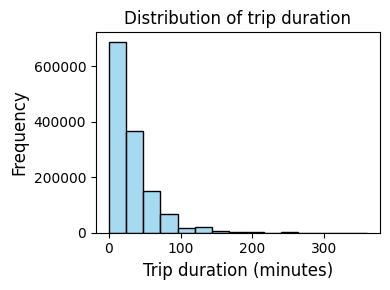

In [19]:
plt.figure(figsize=(4, 3))

# Plot a histogram with KDE overlay
sns.histplot(df_filtered['trip_duration'], kde=False, color='skyblue', bins=15)

# Add labels and title
plt.xlabel("Trip duration (minutes)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of trip duration", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

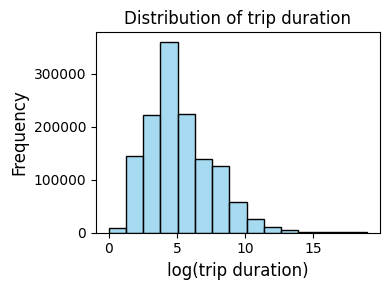

In [20]:
df_filtered['sqrt_trip_duration'] = np.sqrt(df_filtered['trip_duration'])

plt.figure(figsize=(4, 3))

# Plot a histogram with KDE overlay
sns.histplot(df_filtered['sqrt_trip_duration'], kde=False, color='skyblue', bins=15)

# Add labels and title
plt.xlabel("log(trip duration)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of trip duration", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

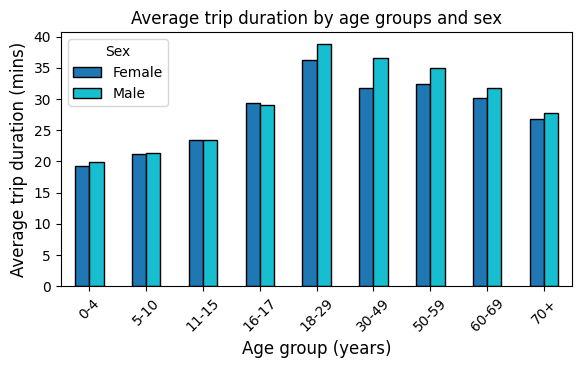

In [21]:
# Compute average trip duration grouped by age_group and sex
# if city-specific: df_filtered[df_filtered["city_name_iso"]=="bogota"]
avg_trip_duration = df_filtered.groupby(["age_group_label", "sex"], observed=True)["trip_duration"].mean().unstack()

# Create figure and axis
scale=1.1
fig, ax = plt.subplots(figsize=(6*scale, 3*scale))

# Plot grouped bar chart
avg_trip_duration.plot(kind="bar", ax=ax, colormap="tab10", edgecolor="black")

# Formatting
ax.set_xlabel("Age group (years)", fontsize=12)
ax.set_ylabel("Average trip duration (mins)", fontsize=12)
ax.set_title("Average trip duration by age groups and sex", fontsize=12)

ax.set_xticklabels(avg_trip_duration.index, rotation=45)  # Rotate x-axis labels
ax.legend(title="Sex", fontsize=10)

# Add grid lines for better readability
# ax.grid(axis="y", alpha=0.7)

# Show the plot
plt.show()

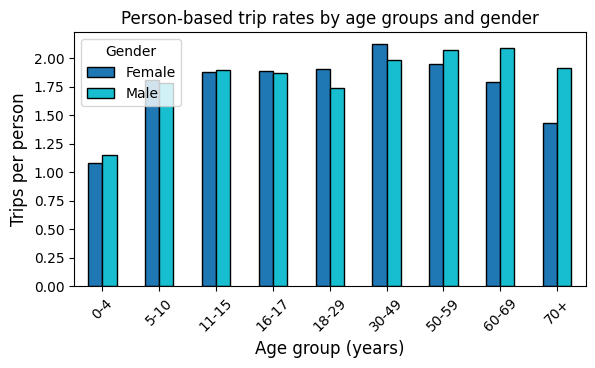

In [22]:
# Trip rates by age and gender

scale= 1.1

# Step 1: Calculate the total number of trips by age group and gender
trips_per_person = df_filtered.groupby(["age_group_label", "sex"], observed=True)["new_trip_id"].count()

# Step 2: Calculate the total number of participants (unique participant_id) by age group and gender
people_per_group = df.groupby(["age_group_label", "sex"], observed=True)["new_participant_id"].nunique()

# Step 3: Calculate person-based trip rates by dividing the total trips by the total people for each group
trip_rate = trips_per_person / people_per_group

# Convert trip_rate to a DataFrame for easy plotting
trip_rate_df = trip_rate.unstack()

# Plot a side-by-side bar chart
ax = trip_rate_df.plot(kind="bar", figsize=(6*scale, 3*scale), colormap="tab10", edgecolor="black", legend=False)

# Formatting the plot
ax.set_xlabel("Age group (years)", fontsize=12)
ax.set_ylabel("Trips per person", fontsize=12)
ax.set_title("Person-based trip rates by age groups and gender", fontsize=12)
ax.set_xticklabels(trip_rate_df.index, rotation=45)  # Rotate x-axis labels for better readability
ax.legend(title="Gender", fontsize=10)

plt.show()

In [23]:
df_filtered.columns

Index(['participant_id', 'age', 'sex', 'trip_id', 'trip_mode', 'trip_duration',
       'city_name', 'trip_new_mode', 'City_name', 'population', 'GDP',
       'city_size', 'day_of_week', 'car_share', 'cycling_share', 'other_share',
       'public_transport_share', 'walking_share', 'country', 'city_name_iso',
       'new_participant_id', 'new_trip_id', 'p.age_gr', 'age_group_label',
       'sqrt_trip_duration'],
      dtype='object')

In [24]:
df_encoded = pd.get_dummies(
    df_filtered[[
        # Demographic and trip features
        'p.age_gr',
        'sex',
        'trip_duration',
        
        # Macro indicators
        'GDP',
        'population',
        'city_size',
        
        # Transport mode shares
        'public_transport_share',
        'cycling_share',
        'car_share',
        'walking_share',
            ]],
    columns=['p.age_gr', 'sex'],
    drop_first=False
)

df_encoded = df_encoded.drop(["sex_Female"], axis=1)

In [25]:
df_encoded.head()

,trip_duration,GDP,population,city_size,public_transport_share,cycling_share,car_share,walking_share,p.age_gr_1,p.age_gr_2,p.age_gr_3,p.age_gr_4,p.age_gr_5,p.age_gr_6,p.age_gr_7,p.age_gr_8,p.age_gr_9,sex_Male
0,60.0,380.0,240.0,225.0,0.282371,0.021027,0.148904,0.547698,False,False,False,False,False,True,False,False,False,True
1,30.0,380.0,240.0,225.0,0.282371,0.021027,0.148904,0.547698,False,False,False,False,False,True,False,False,False,True
2,30.0,380.0,240.0,225.0,0.282371,0.021027,0.148904,0.547698,False,False,False,False,False,True,False,False,False,True
3,60.0,380.0,240.0,225.0,0.282371,0.021027,0.148904,0.547698,False,False,False,False,False,True,False,False,False,True
4,60.0,380.0,240.0,225.0,0.282371,0.021027,0.148904,0.547698,False,False,False,False,False,True,False,False,False,True


In [26]:
import time

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from quantile_forest import RandomForestQuantileRegressor

start_time = time.time()

# RF travel time estimation
X = df_encoded.drop(columns=['trip_duration'])  # All columns except the target
y = df_encoded['trip_duration']  # Target variable (trip_duration)

# Step 3: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

# # RF
# rf_model = RandomForestRegressor(
#     criterion="squared_error",    # Kept as requested
#     n_estimators=100,             # Reduced from 250 to 100 for faster training
#     max_depth=10,                 # Kept to limit tree complexity
#     min_samples_split=50,         # Kept for conservative splits
#     min_samples_leaf=20,          # Kept to ensure robust leaf nodes
#     max_features="sqrt",          # Kept for generalization (sqrt(19) ≈ 4 features per split)
#     n_jobs=-1,                    # Kept to use all CPU cores
#     random_state=42,              # Kept for reproducibility
#     verbose=1                     # Kept for progress monitoring
# )

# # XGBoost
# xgb_model = XGBRegressor(
#     objective="reg:tweedie",
#     tweedie_variance_power=1.9,  # Try 1.1 to 2.0
#     # objective="reg:squarederror",  # MSE loss
#     n_estimators=250,              # Matches reduced random forest setting
#     max_depth=12,                  # Controls tree complexity
#     min_child_weight=20,           # Analogous to min_samples_leaf
#     subsample=0.8,                 # Use 80% of data per tree
#     colsample_bytree=0.3,          # Use ~30% of features (~6/19), like max_features="sqrt"
#     n_jobs=-1,                     # Use all CPU cores
#     random_state=42,
#     verbosity=1                    # Progress monitoring
# )

# QRF regressor
qrf = RandomForestQuantileRegressor(
    n_estimators=100,         # More trees for better accuracy
    max_depth=10,             # Deeper trees to capture more patterns
    min_samples_split=50,     # Higher threshold for robustness on large data
    min_samples_leaf=20,      # Larger leaves for faster, stable predictions
    max_features=0.5,         # Use 50% of features per split for balance
    bootstrap=True,           # Enable bootstrapping for variance reduction
    oob_score=True,           # Use out-of-bag samples for quick validation
    n_jobs=-1,                # Parallelize across all CPU cores
    random_state=42           # For reproducibility
)

# train models
# rf_model.fit(X_train, y_train)
# xgb_model.fit(X_train, y_train)
qrf.fit(X_train, y_train)

# # Get the total number of boosting rounds
# total_trees = xgb_model.n_estimators if hasattr(xgb_model, 'n_estimators') else len(xgb_model.get_booster().get_dump())
# start_tree = 0
# end_tree = np.random.randint(int(0.5 * total_trees), total_trees + 1)

# predictions
# y_pred = rf_model.predict(X_test)
# y_pred_xgb = xgb_model.predict(X_test, iteration_range=(start_tree, end_tree))
# y_pred_qrf = qrf.predict(X_test, quantiles=[0.05, 0.5, 0.95])

# # model evaluation
# mae = mean_absolute_error(y_test, y_pred_xgb)
# mse = mean_squared_error(y_test, y_pred_xgb)

# # Print the evaluation metrics
# print(f"Mean Absolute Error: {mae:.2f}")
# print(f"Mean Squared Error: {mse:.2f}")

# Feature importance
# print("Feature Importance:", xgb_model.feature_importances_)

# Calculate runtime
runtime = time.time() - start_time
print(f"Training completed in {runtime:.2f} seconds")

Training completed in 166.54 seconds



Feature Importance:
                   Feature  Importance
1               population    0.217648
0                      GDP    0.138131
3   public_transport_share    0.106738
8               p.age_gr_2    0.106098
9               p.age_gr_3    0.082092
5                car_share    0.067927
2                city_size    0.067196
6            walking_share    0.046460
4            cycling_share    0.035826
11              p.age_gr_5    0.033380
7               p.age_gr_1    0.027716
16                sex_Male    0.021436
12              p.age_gr_6    0.014070
15              p.age_gr_9    0.011524
10              p.age_gr_4    0.011444
13              p.age_gr_7    0.008616
14              p.age_gr_8    0.003701


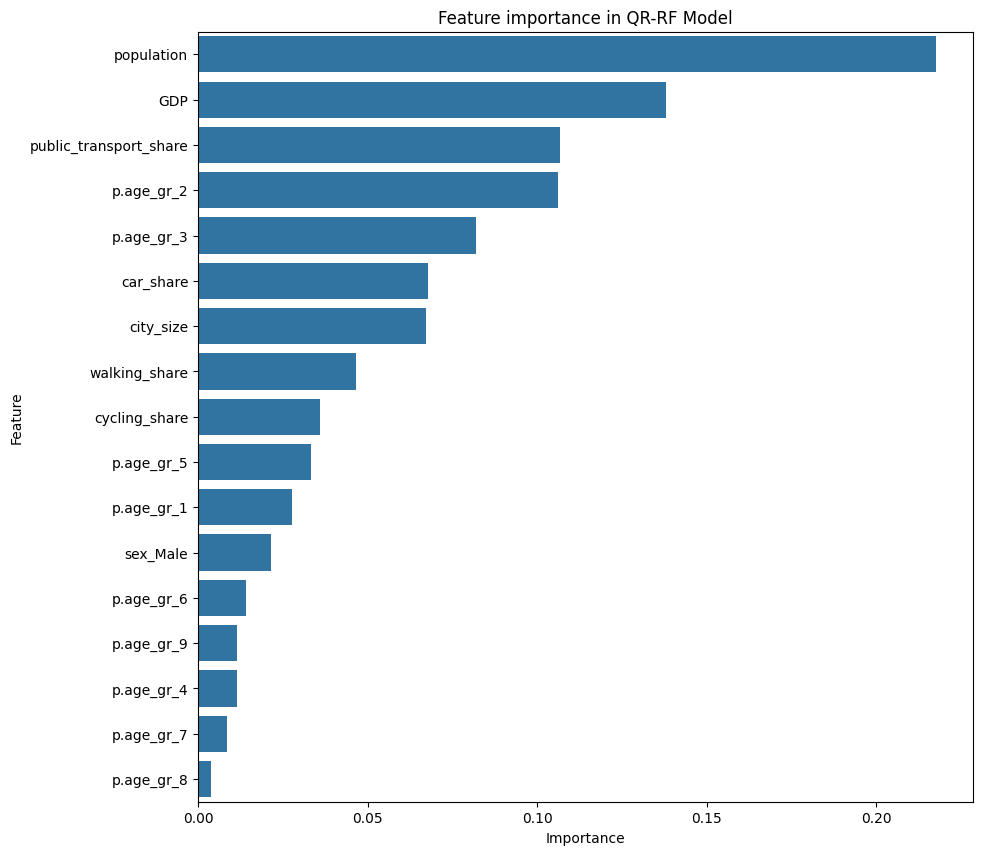

In [27]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': qrf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature importance in QR-RF Model')



plt.show()

In [28]:
import numpy as np
from scipy import stats

# For predictions with quantile regression

def generate_travel_time_predictions_from_qrf(
    qrf_model,
    X_test: np.ndarray,
    n_samples: int = 1000,
    bound_quantiles: tuple = (0.05, 0.95),
    random_seed: int = None,
    precision: int = 1
) -> np.ndarray:
    """
    Generate individual travel time predictions from QRF output with controlled variability.
    
    Parameters:
        qrf_model: Fitted QuantileRegressionForest model with .predict() method
        X_test (np.ndarray): Input features for prediction
        n_samples (int): Number of individual predictions to generate per input row
        bound_quantiles (tuple): Quantiles used for bounds (default 5th and 95th)
        random_seed (int): Optional random seed for reproducibility
        precision (int): Decimal places to round predictions
        
    Returns:
        np.ndarray: Array of shape (len(X_test), n_samples) with individual predictions
        
    Example:
        >>> qrf = RandomForestQuantileRegressor().fit(X_train, y_train)
        >>> preds = generate_travel_time_predictions_from_qrf(qrf, X_test)
        >>> print(preds.shape)  # (n_test_samples, n_samples)
    """
    # Validate inputs
    assert len(bound_quantiles) == 2, "bound_quantiles must contain 2 values"
    assert 0 < bound_quantiles[0] < bound_quantiles[1] < 1, "Quantiles must be 0 < q1 < q2 < 1"
    
    if random_seed is not None:
        np.random.seed(random_seed)
    
    # Get QRF predictions for bounds and median
    lower_q, median, upper_q = qrf_model.predict(X_test, quantiles=[bound_quantiles[0], 0.5, bound_quantiles[1]]).T
    
    # Initialize output array
    all_predictions = np.zeros((len(X_test), n_samples))
    
    for i in range(len(X_test)):
        # Calculate log-normal parameters for this test case
        z_score = stats.norm.ppf(bound_quantiles[1])
        sigma = (np.log(upper_q[i]) - np.log(lower_q[i])) / (2 * z_score)
        mu = np.log(median[i])
        
        # Generate predictions
        preds = np.random.lognormal(mean=mu, sigma=sigma, size=n_samples)
        mask = preds > 360
        while np.any(mask):
            new_samples = np.random.lognormal(mean=mu, sigma=sigma, size=mask.sum())
            preds[mask] = new_samples
            mask = preds > 360
        
        # Force exact median and round
        # preds *= median[i] / np.median(preds)
        all_predictions[i] = np.round(preds, precision)
    
    return all_predictions

if __name__ == "__main__":
    # testing n first samples
    X_test_sample = X_test[:3]  # First 3 test samples

    # testing the full test dataset
    y_pred_qrf = generate_travel_time_predictions_from_qrf(
        qrf_model=qrf,
        X_test=X_test,
        n_samples=1,  # Small sample for demo
        random_seed=42
    )
    
    # print("Generated predictions shape:", preds.shape)
    # print("\nSample output for first test case:")
    # print(f"QRF raw quantiles (5th, 50th, 95th): {qrf.predict(X_test_sample[:1], quantiles=[0.05, 0.5, 0.95])[0]}")
    # print(f"Generated individual predictions: {preds[0]}")

C:\Users\jiawe\AppData\Local\Temp\ipykernel_80784\533416891.py:49: RuntimeWarning: divide by zero encountered in log
  sigma = (np.log(upper_q[i]) - np.log(lower_q[i])) / (2 * z_score)


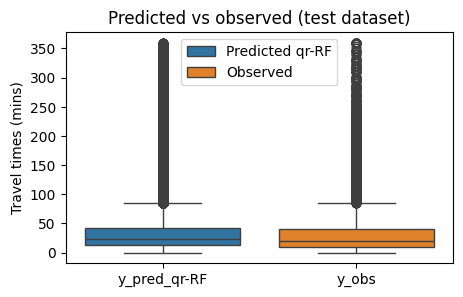

In [29]:
data = {
    #'y_pred': y_pred,  # Predicted values
    'y_pred_qr-RF': y_pred_qrf.reshape(-1),
    #'y_pred_qrf': y_pred_qrf[:,1],
    'y_obs': y_test  # Observed values
}

data = pd.DataFrame(data)

plt.figure(figsize=(10/2, 6/2))
sns.boxplot(data=data)
plt.title('Predicted vs observed (test dataset)')
plt.ylabel('Travel times (mins)')
plt.legend(['Predicted qr-RF', 'Observed'], loc='upper center')

# plt.xlabel('')
plt.show()

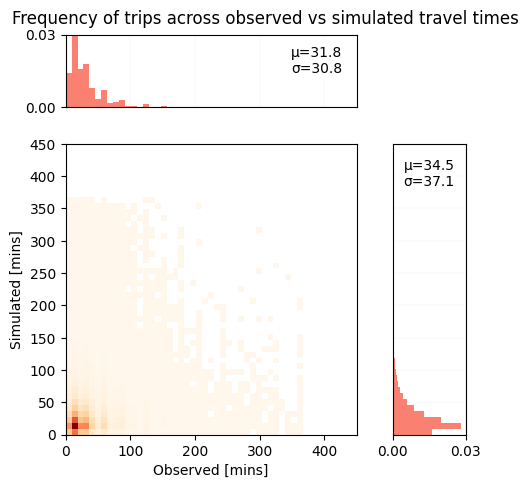

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming data.y_obs and data.y_pred are your datasets
# If not defined, replace with your actual data
# Example: data.y_obs = np.random.rand(1000) * 500, data.y_pred = np.random.rand(1000) * 500

size=5
resolution = 50
upTo= 450

# Define custom bins
x_bins = np.linspace(0, upTo, resolution)  # Custom x bin edges
y_bins = np.linspace(0, upTo, resolution)  # Custom y bin edges

# Create figure and gridspec for layout
fig = plt.figure(figsize=(size, size))
gs = fig.add_gridspec(2, 2, 
                      width_ratios=(4, 1), 
                      height_ratios=(1, 4),
                      left=0.1, 
                      right=0.9, 
                      bottom=0.1, 
                      top=0.9,
                      wspace=0.05*4, 
                      hspace=0.05*4)

# Main 2D histogram
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)  # Marginal x
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)  # Marginal y

# Plot 2D histogram
h = ax.hist2d(data.y_obs, data["y_pred_qr-RF"], bins=[x_bins, y_bins], cmap='OrRd', cmin=1)

# Add a colorbar
# fig.colorbar(h[3], ax=ax, label='Density')

# Plot marginal histograms
ax_histx.hist(data.y_obs, bins=x_bins, density=True, color='salmon')
ax_histy.hist(data["y_pred_qr-RF"], bins=y_bins, density=True, orientation='horizontal', color='salmon')
ax_histx.grid(True, linestyle='--', alpha=0.7, lw=0.1)  # Grid for x-marginal histogram
ax_histy.grid(True, linestyle='--', alpha=0.7, lw=0.1)  # Grid for y-marginal histogram

# Set y-ticks to 2-digit precision in marginal plots
from matplotlib.ticker import FormatStrFormatter  # For tick formatting
ax_histx.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))  # Top marginal (density)
ax_histy.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))  # Right marginal (density)

# Calculate mean and variance for the marginal distributions
mean_obs = np.mean(data["y_obs"])
var_obs = np.std(data["y_obs"])
mean_sim = np.mean(data["y_pred_qr-RF"])
var_sim = np.std(data["y_pred_qr-RF"])

# Add text annotations for mean and variance in marginal plots
ax_histx.text(0.95, 0.85, 
              f"μ={mean_obs:.1f}\nσ={var_obs:.1f}", 
              transform=ax_histx.transAxes, 
              ha='right', va='top', 
              bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

ax_histy.text(0.85, 0.95, 
              f"μ={mean_sim:.1f}\nσ={var_sim:.1f}", 
              transform=ax_histy.transAxes, 
              ha='right', va='top', 
              bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Set y-axis limits for marginal plots (0 to 0.03)
ax_histx.set_ylim(0, 0.03)
ax_histy.set_xlim(0, 0.03)  # Since it's a horizontal histogram, x-axis is density

ax_histx.set_yticks([0, 0.03])
ax_histy.set_xticks([0, 0.03])

# Customize labels
ax.set_xlabel('Observed [mins]')
ax.set_ylabel('Simulated [mins]')
#ax_histx.set_ylabel('Density')
#ax_histy.set_xlabel('Density')

# Remove ticks from marginal plots for cleaner look
ax_histx.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax_histy.tick_params(axis='y', which='both', left=False, labelleft=False)

# Keep title empty as in your code
# ax.set_title('Frequency of trips across observed vs simulated travel times')
fig.suptitle("Frequency of trips across observed vs simulated travel times", fontsize=12, y=0.95)

plt.show()

In [31]:
# Reconstruct the test dataset by combining X_test and y_test
df_test = X_test.copy()
df_test['trip_duration'] = y_test  # Add the target variable (trip duration) to the test set

# Assuming you have predicted values, let's add a column for predicted trip duration
# You should have already made predictions on the test set
df_test['predicted_trip_duration'] = y_pred_qrf  # 'model' is your trained model

In [32]:
import pandas as pd
import numpy as np

def process_age_groups(ndf):
    """
    Processes age group columns in a DataFrame by:
    1. Setting p.age_gr_1 to 1 where all other age columns (p.age_gr_2 to p.age_gr_9) are 0
    2. Creating a consolidated p.age_gr column that contains the age group number
       (defaults to 1 if no age group is selected)
    
    Parameters:
    ndf (pd.DataFrame): Input DataFrame containing age group columns (p.age_gr_1 to p.age_gr_9)
    
    Returns:
    pd.DataFrame: Processed DataFrame with updated age group columns
    """
    # Create a copy of the input DataFrame
    processed_df = ndf.copy()
    
    # Columns p.age_gr_2 to p.age_gr_9
    # age_cols_2_to_9 = [f'p.age_gr_{i}' for i in range(2, 10)]
    
    # Set p.age_gr_1 = 1 where all other age columns are 0, else 0
    # processed_df["p.age_gr_1"] = (processed_df[age_cols_2_to_9] == 0).all(axis=1).astype(int)
    
    # Reorder columns to put p.age_gr_1 first
    # cols = ['p.age_gr_1'] + [col for col in processed_df.columns if col != 'p.age_gr_1']
    # processed_df = processed_df[cols]
    
    # Get all age group columns (p.age_gr_1 to p.age_gr_9)
    all_age_cols = [f'p.age_gr_{i}' for i in range(1, 10)]
    
    # Validate that only one age group is selected per row (or none)
    if not (processed_df[all_age_cols].sum(axis=1).isin([0, 1])).all():
        raise ValueError("Some rows have multiple age groups selected!")
    
    # Create the consolidated age group column
    processed_df['p.age_gr'] = (
        processed_df[all_age_cols].idxmax(axis=1)
        .str.extract(r'(\d+)')
        .astype(int)
    )
    
    # Default to 1 (p.age_gr_1) where no age group is selected
    processed_df['p.age_gr'] = np.where(
        processed_df[all_age_cols].sum(axis=1) == 0,
        1,
        processed_df['p.age_gr']
    )
    
    return processed_df

In [33]:
df_test= process_age_groups(df_test)

In [34]:
df_test.head()

,GDP,population,city_size,public_transport_share,cycling_share,car_share,walking_share,p.age_gr_1,p.age_gr_2,p.age_gr_3,p.age_gr_4,p.age_gr_5,p.age_gr_6,p.age_gr_7,p.age_gr_8,p.age_gr_9,sex_Male,trip_duration,predicted_trip_duration,p.age_gr
2007575,8.0,19.57,52.6,0.049799,0.030292,0.817000,0.102909,True,False,False,False,False,False,False,False,False,True,30.0,21.2,1
2795,380.0,240.00,225.0,0.282371,0.021027,0.148904,0.547698,False,False,False,False,True,False,False,False,False,True,10.0,17.7,5
1817239,65.0,31.00,464.0,0.280286,0.024168,0.395371,0.300174,False,False,False,False,True,False,False,False,False,True,20.0,30.6,5
431791,1890.0,810.00,1587.0,0.299241,0.090437,0.192138,0.354829,False,False,False,False,False,False,True,False,False,True,15.0,140.4,7
1679332,30.0,10.00,405.0,0.142913,0.007835,0.599236,0.248074,False,False,False,False,False,False,False,True,False,False,2.0,12.9,8


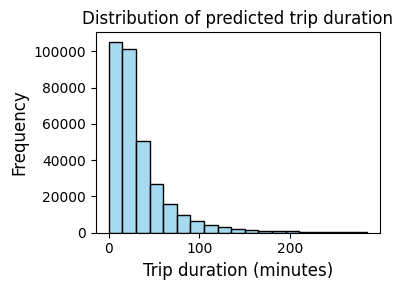

In [35]:
n=2
bins= np.arange(10*2)*30/2

# Create a figure
plt.figure(figsize=(4, 3))

# Plot a histogram with KDE overlay
sns.histplot(df_test['predicted_trip_duration'], kde=False, color='skyblue', bins=bins)

# Add labels and title
# plt.xlim([0, 100])
plt.xlabel("Trip duration (minutes)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of predicted trip duration", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

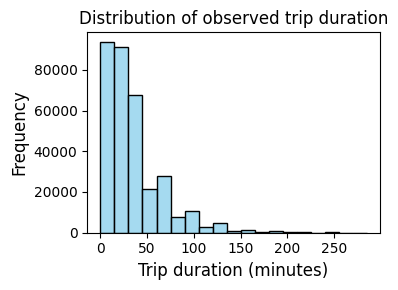

In [36]:
# Create a figure
plt.figure(figsize=(4, 3))

# Plot a histogram with KDE overlay
sns.histplot(df_test['trip_duration'], kde=False, color='skyblue', bins=bins)

# Add labels and title
# plt.xlim([0, 100])
plt.xlabel("Trip duration (minutes)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of observed trip duration", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

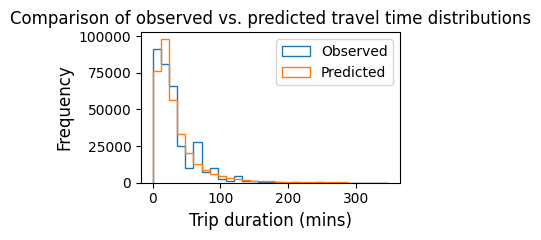

In [37]:
scale= 1.25
plt.figure(figsize=(3 *scale, 2 *scale))

div=12
bins= np.arange(360/div)*div
plt.hist(
    df_test['trip_duration'], 
    bins=bins,  
    alpha=1., 
    label='Observed',  histtype='step'
)
plt.hist(
    df_test['predicted_trip_duration'], 
    bins=bins,
    alpha=1., 
    label='Predicted',
    histtype='step'
)

plt.xlabel("Trip duration (mins)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Comparison of observed vs. predicted travel time distributions", fontsize=12)
plt.legend()



plt.tight_layout()
plt.show()

In [38]:
def duplicate_rows_by_total(df):
    """
    More efficient version using pandas index repetition
    """
    # Filter out zero totals
    df = df[df['Total'] > 0].copy()
    
    # Repeat each row according to Total column
    result_df = df.loc[df.index.repeat(df['Total'])]
    
    # Reset index
    result_df.reset_index(drop=True, inplace=True)
    
    return result_df.drop("Total", axis=1)

def plot_mean_trip_duration_by_age_gender(df, duration_col='trip_duration', 
                                        age_group_prefix='p.age_gr_', 
                                        gender_col='sex_Male',
                                        figsize=(6, 3), 
                                        bar_width=0.35,
                                        color_male='#1f77b4', 
                                        color_female='#ff7f0e',
                                        include_age_group_1=True):
    """
    Plots mean trip duration by age groups and gender, including age group 1.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing the trip data
    duration_col : str (default='trip_duration')
        Column name for trip duration
    age_group_prefix : str (default='p.age_gr_')
        Prefix for age group columns (expects columns like 'p.age_gr_1', 'p.age_gr_2', etc.)
    gender_col : str (default='sex_Male')
        Column name for gender (1=Male, 0=Female)
    figsize : tuple (default=(12, 6))
        Figure size
    bar_width : float (default=0.35)
        Width of bars in the plot
    color_male : str (default='#1f77b4')
        Color for male bars
    color_female : str (default='#ff7f0e')
        Color for female bars
    include_age_group_1 : bool (default=True)
        Whether to include age group 1 in the analysis
    
    Returns:
    --------
    matplotlib.figure.Figure
        The figure object
    """
    
    # Get all age group columns
    age_cols = [col for col in df.columns if col.startswith(age_group_prefix)]
    
    if not age_cols:
        raise ValueError(f"No age group columns found with prefix '{age_group_prefix}'")
    
    # Sort age groups numerically (1-9)
    age_cols = sorted(age_cols, key=lambda x: int(x.replace(age_group_prefix, "")))
    
    # Optionally exclude age group 1
    if not include_age_group_1:
        age_cols = [col for col in age_cols if col != f"{age_group_prefix}1"]
    
    # Calculate mean durations
    results = []
    for age_col in age_cols:
        # Handle age group 1 (where all other age groups are 0)
        if age_col == f"{age_group_prefix}1":
            mask = (df[age_col] == 1)
        else:
            mask = (df[age_col] == 1)
        
        for gender_val, gender_label in [(0, 'Female'), (1, 'Male')]:
            gender_mask = mask & (df[gender_col] == gender_val)
            mean_duration = df.loc[gender_mask, duration_col].mean() # change mean here
            results.append({
                'age_group': age_col.replace(age_group_prefix, ''),
                'gender': gender_label,
                'mean_duration': mean_duration,
                'count': gender_mask.sum()
            })
    
    results_df = pd.DataFrame(results)
    
    # Pivot for plotting
    pivot_df = results_df.pivot(index='age_group', columns='gender', values='mean_duration')
    counts_df = results_df.pivot(index='age_group', columns='gender', values='count')
    
    # Create plot
    fig, ax = plt.subplots(figsize=figsize)
    
    # Set position of bars on X axis
    x = np.arange(len(pivot_df.index))
    x_male = x + bar_width/2
    x_female = x - bar_width/2
    
    # Plot bars
    male_bars = ax.bar(x_male, pivot_df['Male'], width=bar_width, 
                      label='Male', color=color_male)
    female_bars = ax.bar(x_female, pivot_df['Female'], width=bar_width,
                        label='Female', color=color_female)
    
    # Add counts as text above bars
    for i, (male_count, female_count) in enumerate(zip(counts_df['Male'], counts_df['Female'])):
        if not np.isnan(pivot_df['Male'].iloc[i]):
            ax.text(x_male[i], pivot_df['Male'].iloc[i] * 1.02, f'n={male_count:,}', 
                   ha='center', va='bottom', fontsize=8)
        if not np.isnan(pivot_df['Female'].iloc[i]):
            ax.text(x_female[i], pivot_df['Female'].iloc[i] * 1.02, f'n={female_count:,}', 
                   ha='center', va='bottom', fontsize=8)
    
    # Customize plot
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Mean Trip Duration')
    ax.set_title('Mean Trip Duration by Age Group and Gender')
    ax.set_xticks(x)
    ax.set_xticklabels(pivot_df.index)
    ax.legend()
    
    # Rotate x-axis labels if many age groups
    if len(age_cols) > 5:
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    return fig

1.1 Check London

In [39]:
data = pd.read_csv("D:/phd/合作项目/chenxiproject/transport/GUPT dataset_2024_10_26 - Sheet1.csv",encoding="latin1")

data_city = data[['Country', 'City','Year','Population (10,000)', 'Area(km2)', 'GDP(billion $)']]
data_city

,Country,City,Year,"Population (10,000)",Area(km2),GDP(billion $)
0,Mexico,Mexico City,2001.0,NaN,1485,NaN
1,Mexico,Mexico City,2002.0,NaN,1485,NaN
2,Mexico,Mexico City,2003.0,NaN,1485,NaN
3,Mexico,Mexico City,2004.0,NaN,1485,NaN
4,Mexico,Mexico City,2005.0,NaN,1485,NaN
...,...,...,...,...,...,...
5994,Russia,Kazan,2019.0,124,425.3,30
5995,Serbia,Belgrade,2019.0,137,389.12,50
5996,Ukraine,Kiev,2019.0,295,695.53,60
5997,Ukraine,Odessa,2019.0,101,97.03,NaN


In [40]:
df_london = data_city[(data_city['City']=="London") &(data_city['Year']==2019.0)]
df_london 

,Country,City,Year,"Population (10,000)",Area(km2),GDP(billion $)
519,United Kingdom,London,2019.0,930,1572,643


In [41]:
data_london = pd.read_csv("D:/phd/合作项目/chenxiproject/transport/synthetic_population_2019-London.csv")
data_london.head()

,participant_id,Age,Sex,City,car_share,cycling_share,other_share,public_transport_share,walking_share
0,1,5,F,London,0.2043,0.0248,0.0018,0.3051,0.464
1,2,7,F,London,0.2043,0.0248,0.0018,0.3051,0.464
2,3,6,F,London,0.2043,0.0248,0.0018,0.3051,0.464
3,4,5,F,London,0.2043,0.0248,0.0018,0.3051,0.464
4,5,7,F,London,0.2043,0.0248,0.0018,0.3051,0.464


In [42]:
data_predict = data_london.merge(df_london,on = 'City')
data_predict.rename(columns={
    'Age': 'age',
    'Sex': 'sex',
    'Population (10,000)': 'population',
    'Area(km2)': 'city_size',
    'GDP(billion $)': 'GDP'

}, inplace=True)

data_predict



,participant_id,age,sex,City,car_share,cycling_share,other_share,public_transport_share,walking_share,Country,Year,population,city_size,GDP
0,1,5,F,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643
1,2,7,F,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643
2,3,6,F,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643
3,4,5,F,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643
4,5,7,F,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79788,79789,80,M,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643
79789,79790,84,M,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643
79790,79791,93,M,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643
79791,79792,87,M,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643


In [43]:
# Define the bin edges (note these are the lower bounds of each group)
bins = [0, 5, 11, 16, 18, 30, 50, 60, 70, 125]  # 125 as upper limit

# Define the corresponding labels
labels = [
    "0-4",
    "5-10",
    "11-15",
    "16-17",
    "18-29",
    "30-49",
    "50-59",
    "60-69",
    "70+"
]

# Define the corresponding category numbers
category_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # 1=0-4, 2=5-10, ..., 9=70+

# Assign age group categories
data_predict["p.age_gr"] = pd.cut(
    data_predict["age"],
    bins=bins,
    labels=category_numbers,
    right=False
)

# Optional: Also keep the original labels if needed
data_predict["age_group_label"] = pd.cut(
    data_predict["age"],
    bins=bins,
    labels=labels,
    right=False
)

In [44]:
stats_before = data_predict.shape

df_filtered_london= data_predict.copy()

df_filtered_london= df_filtered_london.dropna(subset=['age'])
df_filtered_london= df_filtered_london.dropna(subset=['sex'])
df_filtered_london = df_filtered_london[df_filtered_london['age'] <= 100]

print("Nb of rows removed: " + str(stats_before[0]- df_filtered_london.shape[0]))

Nb of rows removed: 0


In [45]:
df_encoded = pd.get_dummies(
    df_filtered_london[[
        # Demographic and trip features
        'p.age_gr',
        'sex',
        
        # Macro indicators
        'GDP',
        'population',
        'city_size',
        
        # Transport mode shares
        'public_transport_share',
        'cycling_share',
        'car_share',
        'walking_share',
            ]],
    columns=['p.age_gr', 'sex'],
    drop_first=False
)

df_encoded["sex_Male"]=df_encoded["sex_M"]

In [46]:
data_predict["trip_duration"]= generate_travel_time_predictions_from_qrf(
        qrf_model=qrf,
        X_test=df_encoded[X_train.columns],
        n_samples=1,  # Small sample for demo
        random_seed=42
    )


In [47]:
data_predict.head()

,participant_id,age,sex,City,car_share,cycling_share,other_share,public_transport_share,walking_share,Country,Year,population,city_size,GDP,p.age_gr,age_group_label,trip_duration
0,1,5,F,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643,2,5-10,30.4
1,2,7,F,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643,2,5-10,17.8
2,3,6,F,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643,2,5-10,34.6
3,4,5,F,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643,2,5-10,72.4
4,5,7,F,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643,2,5-10,16.4


In [48]:
# Calculate average trip duration for X_bogotaVIZ
avg_London = data_predict.groupby('p.age_gr', observed=False)['trip_duration'].mean().reset_index()
avg_London['dataset'] = 'Predictive model'  # Add identifier column

# Calculate average trip duration for df_filtered
avg_filtered = df_filtered[(df_filtered["city_name_iso"]=="london")].groupby('p.age_gr', observed=False)['trip_duration'].mean().reset_index() # & (df_filtered["trip_duration"]>0)
avg_filtered['dataset'] = 'Travel survey London'  # Add identifier column

# Combine both datasets
combined_avg = pd.concat([avg_London, avg_filtered])
combined_avg['trip_duration'] = combined_avg['trip_duration'].fillna(0)

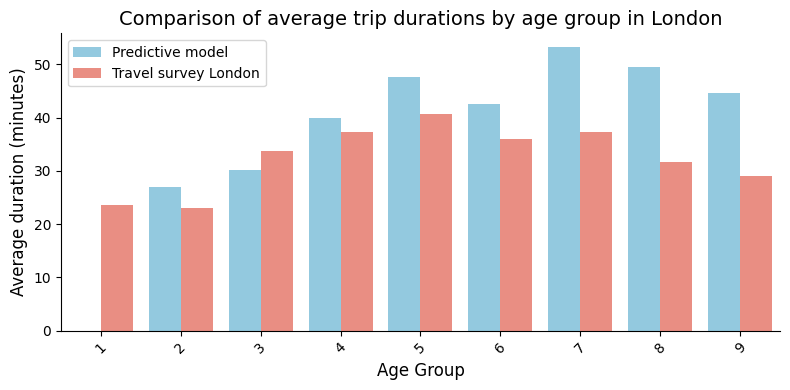

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

scale=1.5
plt.figure(figsize=(12/scale, 6/scale))
sns.barplot(data=combined_avg, x='p.age_gr', y='trip_duration', 
            hue='dataset', palette=['skyblue', 'salmon'])
plt.title('Comparison of average trip durations by age group in London', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average duration (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='')
sns.despine()
plt.tight_layout()
plt.show()

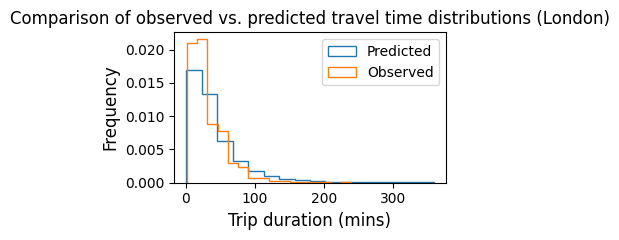

In [50]:
scale= 1.25
plt.figure(figsize=(3 *scale, 2 *scale))

# predicted
bins=2**4
plt.hist(data_predict["trip_duration"], bins, histtype="step", density=True)
plt.hist(df_filtered[df_filtered.city_name_iso=="london"]["trip_duration"], bins, histtype="step", density=True)


plt.xlabel("Trip duration (mins)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Comparison of observed vs. predicted travel time distributions (London)", fontsize=12)
plt.legend(['Predicted', 'Observed'])

plt.tight_layout()
plt.show()

1.2 mode

In [51]:
df.head()

,participant_id,age,sex,trip_id,trip_mode,trip_duration,city_name,trip_new_mode,City_name,population,...,cycling_share,other_share,public_transport_share,walking_share,country,city_name_iso,new_participant_id,new_trip_id,p.age_gr,age_group_label
0,1,36.0,Male,1.0,bus,60.0,accra-,pt,Accra,240.0,...,0.021027,0.0,0.282371,0.547698,ghana,accra,accra-_1_Male,accra-_1_Male_1.0,6,30-49
1,1,36.0,Male,2.0,bus,30.0,accra-,pt,Accra,240.0,...,0.021027,0.0,0.282371,0.547698,ghana,accra,accra-_1_Male,accra-_1_Male_2.0,6,30-49
2,1,36.0,Male,3.0,bus,30.0,accra-,pt,Accra,240.0,...,0.021027,0.0,0.282371,0.547698,ghana,accra,accra-_1_Male,accra-_1_Male_3.0,6,30-49
3,1,36.0,Male,4.0,bus,60.0,accra-,pt,Accra,240.0,...,0.021027,0.0,0.282371,0.547698,ghana,accra,accra-_1_Male,accra-_1_Male_4.0,6,30-49
4,1,36.0,Male,5.0,taxi,60.0,accra-,car,Accra,240.0,...,0.021027,0.0,0.282371,0.547698,ghana,accra,accra-_1_Male,accra-_1_Male_5.0,6,30-49


In [52]:
df.trip_new_mode.value_counts()

trip_new_mode
walk     364349
car      347064
pt       320113
bike      81862
other     15857
Name: count, dtype: int64

In [53]:
df_filtered = df_filtered.dropna(subset=['trip_new_mode'])
df_filtered['trip_new_mode'].unique()

array(['pt', 'car', 'walk', 'bike', 'other'], dtype=object)

In [54]:
df_filtered.columns

Index(['participant_id', 'age', 'sex', 'trip_id', 'trip_mode', 'trip_duration',
       'city_name', 'trip_new_mode', 'City_name', 'population', 'GDP',
       'city_size', 'day_of_week', 'car_share', 'cycling_share', 'other_share',
       'public_transport_share', 'walking_share', 'country', 'city_name_iso',
       'new_participant_id', 'new_trip_id', 'p.age_gr', 'age_group_label',
       'sqrt_trip_duration'],
      dtype='object')

In [55]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df_encoded = pd.get_dummies(
    df_filtered[[
        # Demographic and trip features
        'p.age_gr',
        'sex',
        'trip_duration',
        'trip_new_mode',
        
        # Macro indicators
        'GDP',
        'population',
        'city_size',
        
        # Transport mode shares
        'public_transport_share',
        'cycling_share',
        'car_share',
        'walking_share',
        
    ]],
    columns=['p.age_gr', 'sex'],
    drop_first=False
)

# Encode target variable
le_mode = LabelEncoder()
df_encoded['trip_new_mode'] = le_mode.fit_transform(df_encoded['trip_new_mode'])
df_encoded = df_encoded.drop(["sex_Female"], axis=1)

In [56]:
df_encoded.columns

Index(['trip_duration', 'trip_new_mode', 'GDP', 'population', 'city_size',
       'public_transport_share', 'cycling_share', 'car_share', 'walking_share',
       'p.age_gr_1', 'p.age_gr_2', 'p.age_gr_3', 'p.age_gr_4', 'p.age_gr_5',
       'p.age_gr_6', 'p.age_gr_7', 'p.age_gr_8', 'p.age_gr_9', 'sex_Male'],
      dtype='object')

In [57]:
# Define features (X) and target (y)
X = df_encoded.drop(columns=['trip_new_mode'])
y = df_encoded['trip_new_mode']

# 3. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [58]:
from xgboost import XGBClassifier
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights for imbalance handling
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
sample_weights = np.array([class_weights[cls] for cls in y_train])

xgb_model = XGBClassifier(
    # Core parameters
    objective='multi:softprob',
    num_class=6,                # Critical for 6-class classification
    eval_metric='mlogloss',     # Multi-class logloss
    
    # Tree structure (similar to your RF)
    n_estimators=200,           # Can increase since we'll use early stopping
    max_depth=10,               # Same as your RF
    min_child_weight=5,         # Analogous to min_samples_leaf=5
    gamma=0.1,                  # Slight regularization on splits
    
    # Randomization (like RF's feature sampling)
    subsample=0.8,              # Randomly sample 80% of instances
    colsample_bytree=0.8,       # Randomly sample 80% of features
    
    # Regularization
    reg_alpha=0.1,              # L1 regularization
    reg_lambda=1.0,             # L2 regularization
    
    # Learning
    learning_rate=0.05,         # Lower than default for better generalization
    early_stopping_rounds=20,   # Auto-stop if no improvement
    
    # System
    n_jobs=-1,
    random_state=42,
    verbosity=1
)

# Train with class weights and validation monitoring
xgb_model.fit(
    X_train, y_train,
    sample_weight=sample_weights,
    eval_set=[(X_test, y_test)],
    verbose=False
)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,20
,enable_categorical,False
,eval_metric,'mlogloss'


In [59]:
# 1. Generate deterministic predictions (class labels)
X_pred_xgb = xgb_model.predict(X_test)

# 2. Generate probabilistic predictions (recommended for most cases)
X_pred_proba = xgb_model.predict_proba(X_test)

# 3. (Optional) Stochastic sampling from probabilities
np.random.seed(42)  # for reproducibility
stochastic_preds = np.array([
    np.random.choice(np.arange(X_pred_proba.shape[1]), p=probs)
    for probs in X_pred_proba
])

# Create comprehensive output DataFrame
results = pd.DataFrame({
    'deterministic_pred': X_pred_xgb,
    'stochastic_pred': stochastic_preds,
    **{f'prob_class_{i}': X_pred_proba[:, i] 
       for i in range(X_pred_proba.shape[1])}
})

Classification Report:


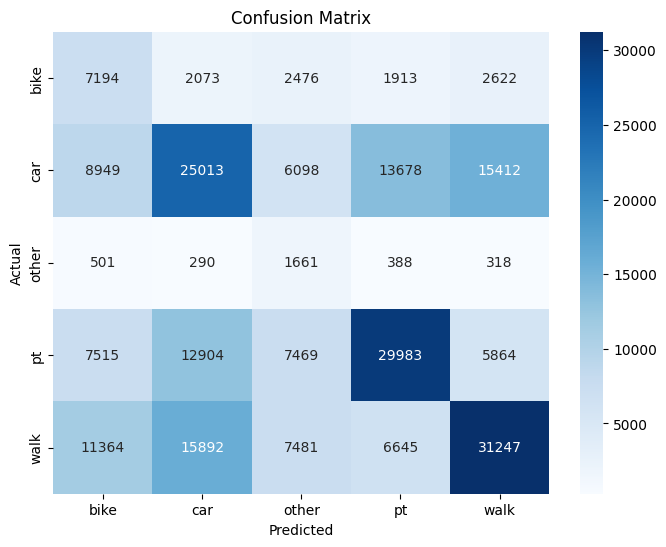


Feature Importance:
                   Feature  Importance
7            walking_share    0.244377
5            cycling_share    0.240617
6                car_share    0.133966
0            trip_duration    0.050097
4   public_transport_share    0.036181
9               p.age_gr_2    0.036065
10              p.age_gr_3    0.034817
12              p.age_gr_5    0.031317
17                sex_Male    0.030764
3                city_size    0.029926
1                      GDP    0.026240
13              p.age_gr_6    0.022685
2               population    0.017411
16              p.age_gr_9    0.014618
11              p.age_gr_4    0.014328
14              p.age_gr_7    0.013999
15              p.age_gr_8    0.011661
8               p.age_gr_1    0.010931


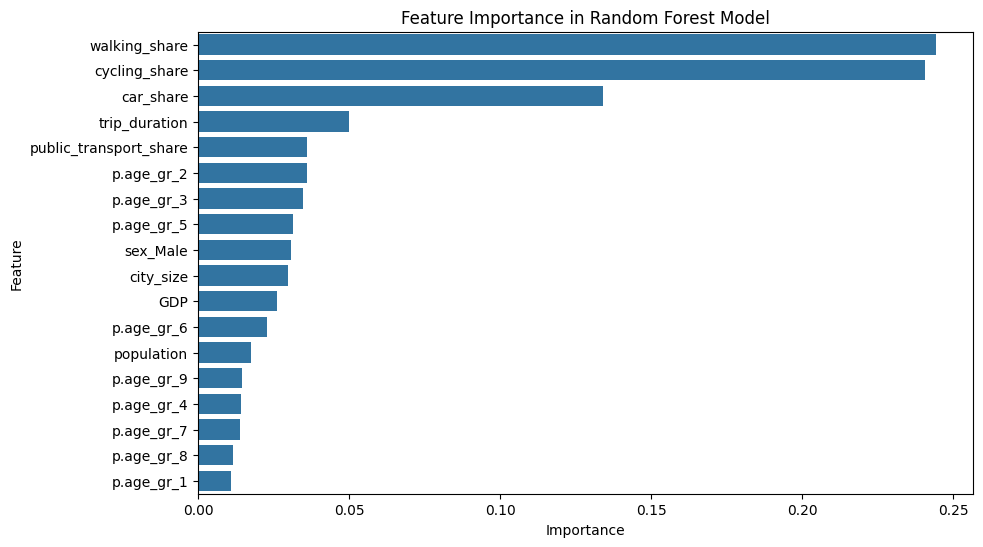

In [60]:
# Print classification report
print("Classification Report:")
# print(classification_report(y_test, y_pred, target_names=le_mode.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, stochastic_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_mode.classes_, yticklabels=le_mode.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Cross-validation score
# cv_scores = cross_val_score(rf_cmodel, X, y, cv=5, scoring='f1_weighted')
# print(f"Cross-Validation F1-Weighted Scores: {cv_scores}")
# print(f"Mean CV F1-Weighted Score: {cv_scores.mean():.3f} (±{cv_scores.std():.3f})")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Model')

plt.show()


Mode Shares (%):
        Observed  Predicted
bike    7.236275  13.287397
car    30.740164  23.994221
other   1.403868  12.477439
pt     28.332963  24.460102
walk   32.286730  25.780840


<Figure size 1000x600 with 0 Axes>

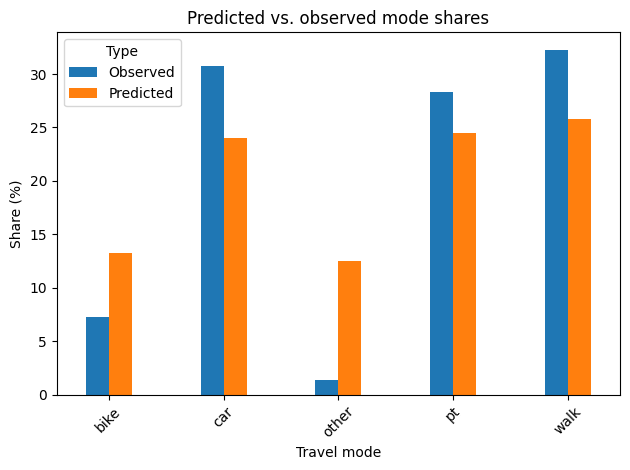


Absolute differences in mode shares (%):
       Absolute difference
bike              6.051122
car               6.745944
other            11.073572
pt                3.872861
walk              6.505890


In [61]:
# Calculate Mode Shares
# Observed mode shares (actual, from y_test)
observed_shares = pd.Series(y_test).value_counts(normalize=True).rename('Observed')
observed_shares.index = le_mode.inverse_transform(observed_shares.index)

# Predicted mode shares (from y_pred)
predicted_shares = pd.Series(X_pred_xgb).value_counts(normalize=True).rename('Predicted')
predicted_shares.index = le_mode.inverse_transform(predicted_shares.index)

# Combine into a DataFrame
mode_shares = pd.DataFrame({
    'Observed': observed_shares,
    'Predicted': predicted_shares
}).fillna(0)  # Fill missing modes with 0 if any

# Convert to percentages for readability
mode_shares *= 100

# Print mode shares
print("\nMode Shares (%):")
print(mode_shares)

# 7. Visualize Mode Shares (Updated)
plt.figure(figsize=(10, 6))
mode_shares.plot(kind='bar', width=0.4)
plt.title('Predicted vs. observed mode shares')
plt.xlabel('Travel mode')
plt.ylabel('Share (%)')
# Explicitly set x-axis labels to mode names
plt.xticks(ticks=range(len(mode_shares.index)), labels=mode_shares.index, rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

# 8. Calculate Absolute Differences
mode_shares['Absolute difference'] = abs(mode_shares['Predicted'] - mode_shares['Observed'])
print("\nAbsolute differences in mode shares (%):")
print(mode_shares[['Absolute difference']])


# Kelly : cycling / motocycling ... 
# pt/car ownership estimates from other datastets
# motorcyling -> injuries 

In [62]:
X_test.columns

Index(['trip_duration', 'GDP', 'population', 'city_size',
       'public_transport_share', 'cycling_share', 'car_share', 'walking_share',
       'p.age_gr_1', 'p.age_gr_2', 'p.age_gr_3', 'p.age_gr_4', 'p.age_gr_5',
       'p.age_gr_6', 'p.age_gr_7', 'p.age_gr_8', 'p.age_gr_9', 'sex_Male'],
      dtype='object')

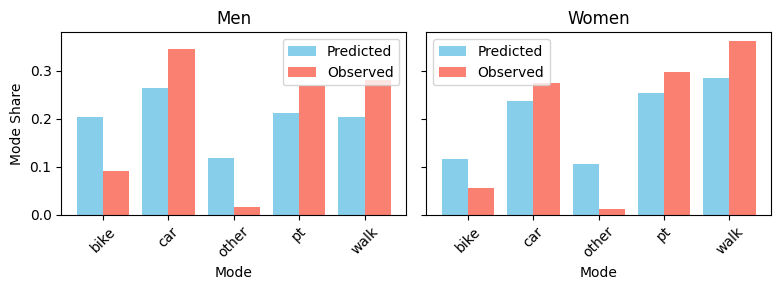

In [63]:
res1=X_test.copy()
res1["predicted_mode"]= stochastic_preds
res1["observed_mode"]= y_test
res1[["predicted_mode","observed_mode","sex_Male"]]

modes = np.arange(len(mode_shares.index))

# Compute mode shares by gender

shares = []

for sex in [True, False]:
    sex_label = 'Men' if sex else 'Women'
    df_sex = res1[res1['sex_Male'] == sex]
    total = len(df_sex)
    
    # Predicted and observed mode shares
    for mode in modes:
        pred_share = len(df_sex[df_sex['predicted_mode'] == mode]) / total if total > 0 else 0
        obs_share = len(df_sex[df_sex['observed_mode'] == mode]) / total if total > 0 else 0
        shares.append({'Sex': sex_label, 'Mode': mode, 'Predicted': pred_share, 'Observed': obs_share})

# Convert to DataFrame for plotting
shares_df = pd.DataFrame(shares)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(4*2, 3), sharey=True)

# Men plot
men_df = shares_df[shares_df['Sex'] == 'Men']
axes[0].bar(men_df['Mode'] - 0.2, men_df['Predicted'], width=0.4, label='Predicted', color='skyblue')
axes[0].bar(men_df['Mode'] + 0.2, men_df['Observed'], width=0.4, label='Observed', color='salmon')
axes[0].set_title('Men')
axes[0].set_xlabel('Mode')
axes[0].set_ylabel('Mode Share')
#axes[0].set_xticks(modes)
axes[0].set_xticks(ticks=range(len(mode_shares.index)), labels=mode_shares.index, rotation=45)
axes[0].legend()

# Women plot
women_df = shares_df[shares_df['Sex'] == 'Women']
axes[1].bar(women_df['Mode'] - 0.2, women_df['Predicted'], width=0.4, label='Predicted', color='skyblue')
axes[1].bar(women_df['Mode'] + 0.2, women_df['Observed'], width=0.4, label='Observed', color='salmon')
axes[1].set_title('Women')
axes[1].set_xlabel('Mode')
axes[1].set_xticks(ticks=range(len(mode_shares.index)), labels=mode_shares.index, rotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()

In [64]:
data_predict_mode = data_predict.copy()


# Attach trip modes

data_predict_mode


,participant_id,age,sex,City,car_share,cycling_share,other_share,public_transport_share,walking_share,Country,Year,population,city_size,GDP,p.age_gr,age_group_label,trip_duration
0,1,5,F,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643,2,5-10,30.4
1,2,7,F,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643,2,5-10,17.8
2,3,6,F,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643,2,5-10,34.6
3,4,5,F,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643,2,5-10,72.4
4,5,7,F,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643,2,5-10,16.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79788,79789,80,M,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643,9,70+,8.7
79789,79790,84,M,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643,9,70+,22.9
79790,79791,93,M,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643,9,70+,35.8
79791,79792,87,M,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643,9,70+,5.5


In [65]:
df_encoded = pd.get_dummies(
    data_predict_mode[[
        # Demographic and trip features
        'p.age_gr',
        'sex',
        'trip_duration',
        
        # Macro indicators
        'GDP',
        'population',
        'city_size',
        
        # Transport mode shares
        'public_transport_share',
        'cycling_share',
        'car_share',
        'walking_share',
            ]],
    columns=['p.age_gr', 'sex'],
    drop_first=False
)


df_encoded["sex_Male"]=df_encoded["sex_M"]

In [66]:
df_encoded.head()

,trip_duration,GDP,population,city_size,public_transport_share,cycling_share,car_share,walking_share,p.age_gr_1,p.age_gr_2,p.age_gr_3,p.age_gr_4,p.age_gr_5,p.age_gr_6,p.age_gr_7,p.age_gr_8,p.age_gr_9,sex_F,sex_M,sex_Male
0,30.4,643,930,1572,0.3051,0.0248,0.2043,0.464,False,True,False,False,False,False,False,False,False,True,False,False
1,17.8,643,930,1572,0.3051,0.0248,0.2043,0.464,False,True,False,False,False,False,False,False,False,True,False,False
2,34.6,643,930,1572,0.3051,0.0248,0.2043,0.464,False,True,False,False,False,False,False,False,False,True,False,False
3,72.4,643,930,1572,0.3051,0.0248,0.2043,0.464,False,True,False,False,False,False,False,False,False,True,False,False
4,16.4,643,930,1572,0.3051,0.0248,0.2043,0.464,False,True,False,False,False,False,False,False,False,True,False,False


In [67]:

# 转换 GDP 和 population 为 float 类型
df_encoded['GDP'] = pd.to_numeric(df_encoded['GDP'], errors='coerce')
df_encoded['population'] = pd.to_numeric(df_encoded['population'], errors='coerce')

# 将 city_size 转为 category 类型
df_encoded['city_size'] = df_encoded['city_size'].astype('category')

nclasses=6

probas= xgb_model.predict_proba(df_encoded[X_train.columns])

# Number of classes
n_classes = probas.shape[1]  

# Sample a class for each row
data_predict_mode["trip_mode"] = np.array([np.random.choice(n_classes, p=row_probs) for row_probs in probas])




In [68]:
data_predict_mode.head()

,participant_id,age,sex,City,car_share,cycling_share,other_share,public_transport_share,walking_share,Country,Year,population,city_size,GDP,p.age_gr,age_group_label,trip_duration,trip_mode
0,1,5,F,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643,2,5-10,30.4,1
1,2,7,F,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643,2,5-10,17.8,4
2,3,6,F,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643,2,5-10,34.6,4
3,4,5,F,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643,2,5-10,72.4,3
4,5,7,F,London,0.2043,0.0248,0.0018,0.3051,0.464,United Kingdom,2019.0,930,1572,643,2,5-10,16.4,1


In [69]:
data_predict_mode["trip_mode_predict"]= le_mode.inverse_transform(data_predict_mode['trip_mode'])
data_predict_mode["trip_mode_predict"].value_counts()

data_predict_mode.to_csv("London_results.csv", index=False)




Mode Shares:
    mode  Predicted  Observed
0     pt   0.382327    0.3051
1   walk   0.320630    0.4640
2    car   0.172847    0.2043
3   bike   0.106087    0.0248
4  other   0.018109    0.0018


<Figure size 1000x600 with 0 Axes>

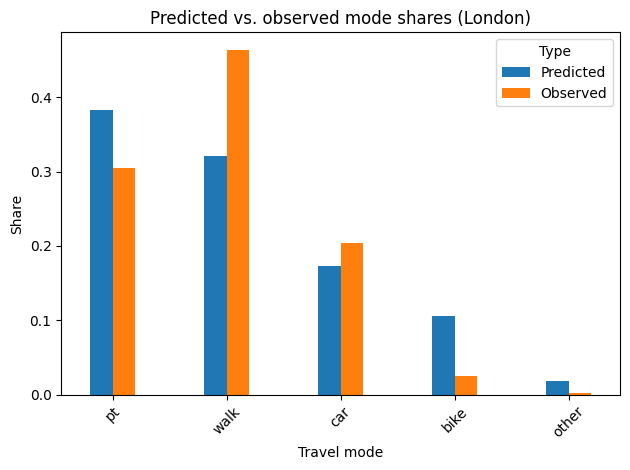


Absolute differences in mode shares (London):
   Absolute difference
0             0.077227
1             0.143370
2             0.031453
3             0.081287
4             0.016309


In [70]:
# Calculate Mode Shares
# Observed mode shares (actual, from y_test)

GUT_shares = pd.DataFrame({
    'mode': ['walk', 'bike', 'pt', 'car', 'other'],
    'Observed': [0.464, 0.0248, 0.3051, 0.2043,  0.0018]
})


# Predicted mode shares (from y_pred)
predicted_shares = pd.Series(data_predict_mode["trip_mode_predict"]).value_counts(normalize=True).rename('Predicted')
predicted_shares = predicted_shares.rename('Predicted').reset_index()
predicted_shares.columns = ['mode', 'Predicted']


# Combine into a DataFrame
mode_shares = predicted_shares.merge(GUT_shares, on='mode').fillna(0)


  # Fill missing modes with 0 if any
mode_shares

# Print mode shares
print("\nMode Shares:")
print(mode_shares)

# 7. Visualize Mode Shares (Updated)
plt.figure(figsize=(10, 6))
mode_shares.plot(kind='bar', width=0.4)
plt.title('Predicted vs. observed mode shares (London)')
plt.xlabel('Travel mode')
plt.ylabel('Share')
# Explicitly set x-axis labels to mode names
plt.xticks(ticks=range(len(mode_shares.index)), labels=mode_shares['mode'], rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

# 8. Calculate Absolute Differences
mode_shares['Absolute difference'] = abs(mode_shares['Predicted'] - mode_shares['Observed'])
print("\nAbsolute differences in mode shares (London):")
print(mode_shares[['Absolute difference']])


# Kelly : cycling / motocycling ... 
# pt/car ownership estimates from other datastets
# motorcyling -> injuries 

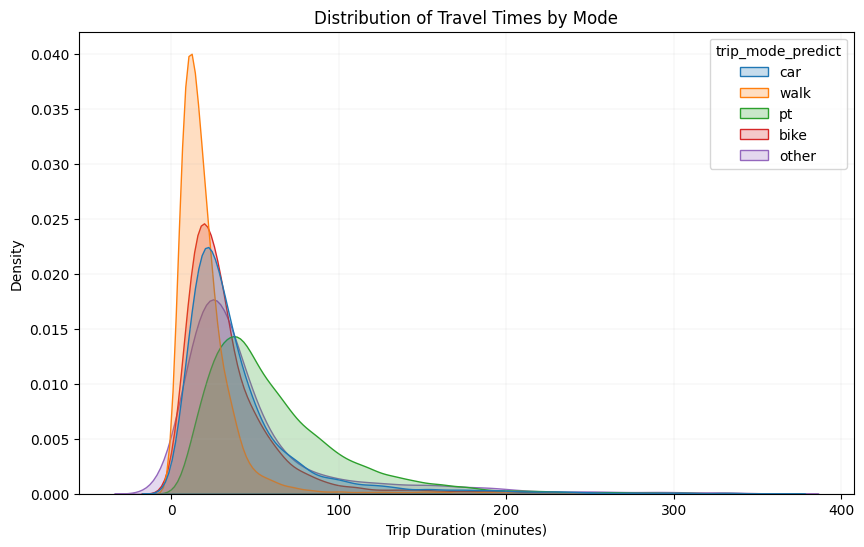

In [71]:
# Create the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data_predict_mode, x='trip_duration', hue='trip_mode_predict', fill=True, common_norm=False)

plt.title('Distribution of Travel Times by Mode')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Density')
plt.grid(True, lw=0.1)
plt.show()